# Objective: Understand the basics of machine learning and Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer


%matplotlib inline
sns.set()

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [4]:
rng = np.random.default_rng(42)
mask1 = rng.choice([False, True], size=len(df), p=[0.95, 0.05])
mask2 = rng.choice([False, True], size=len(df), p=[0.95, 0.05])
df.loc[mask1, 'sepal length (cm)'] = np.nan
df.loc[mask2, 'sepal width (cm)']  = np.nan
print("Missing values before imputation:")
print(df.isna().sum())
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])
print()
print("Missing values after imputation:")
print(df.isna().sum())

Missing values before imputation:
sepal length (cm)    6
sepal width (cm)     6
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Missing values after imputation:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [5]:
le = LabelEncoder()
df['species_label'] = le.fit_transform(df['species'])          # label encoded
df = pd.concat([df, pd.get_dummies(df['species'], prefix='species')], axis=1)  # one-hot
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_label,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,True,False,False
1,4.9,3.0,1.4,0.2,setosa,0,True,False,False
2,4.7,3.2,1.3,0.2,setosa,0,True,False,False
3,4.6,3.1,1.5,0.2,setosa,0,True,False,False
4,5.0,3.6,1.4,0.2,setosa,0,True,False,False


In [6]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.904334,1.024145,-1.340227,-1.315444
1,-1.144599,-0.129821,-1.340227,-1.315444
2,-1.384865,0.331765,-1.397064,-1.315444
3,-1.504998,0.100972,-1.283389,-1.315444
4,-1.024467,1.254938,-1.340227,-1.315444


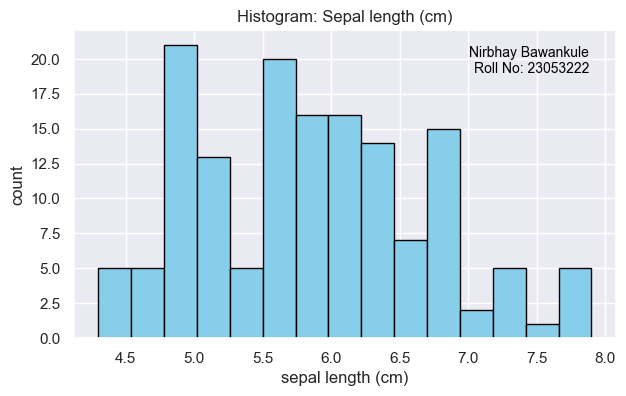

In [7]:
plt.figure(figsize=(7,4))
plt.hist(df['sepal length (cm)'], bins=15, color='skyblue', edgecolor='black')
plt.title('Histogram: Sepal length (cm)')
plt.xlabel('sepal length (cm)')
plt.ylabel('count')

plt.text(0.95, 0.95, "Nirbhay Bawankule\nRoll No: 23053222",
         fontsize=10, color='black',
         ha='right', va='top',
         transform=plt.gca().transAxes)

plt.show()


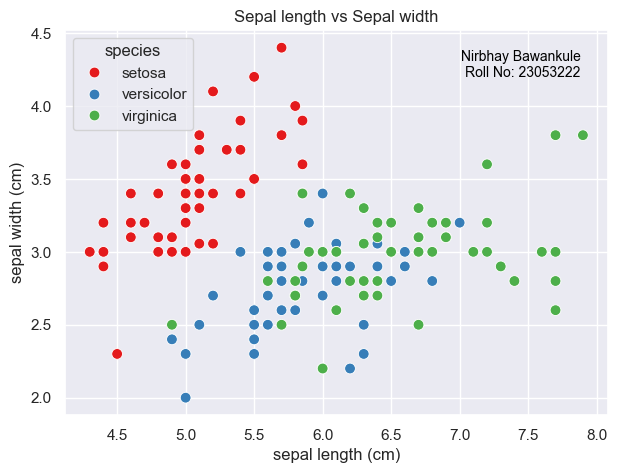

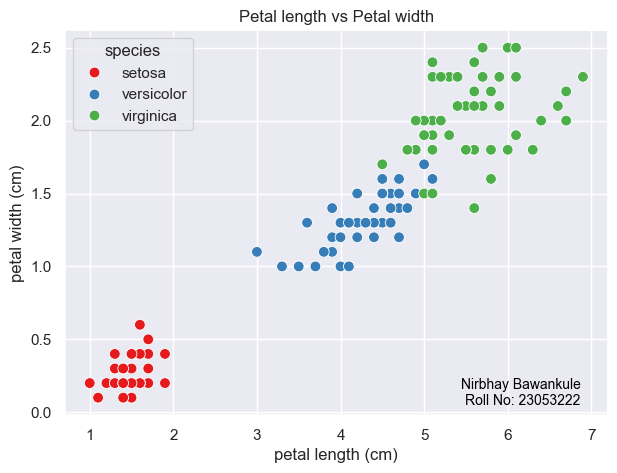

In [8]:
# Cell 8: scatter plots to see relationships (colored by species)
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', s=60, palette='Set1')
plt.title('Sepal length vs Sepal width')
plt.text(0.95, 0.95, "Nirbhay Bawankule\nRoll No: 23053222",
         fontsize=10, color='black',
         ha='right', va='top',
         transform=plt.gca().transAxes)
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', s=60, palette='Set1')
plt.title('Petal length vs Petal width')

plt.text(0.95, 0.02, "Nirbhay Bawankule\nRoll No: 23053222", fontsize=10, color='black',
         ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()


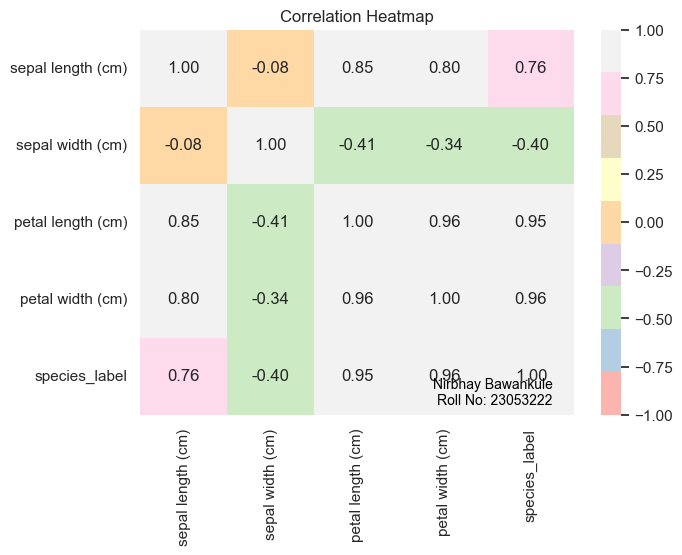

In [9]:
# Cell 9: correlation heatmap of numeric features
# Cell 9: correlation heatmap of numeric features
features = iris.feature_names

corr = df[features + ['species_label']].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap='Pastel1')
plt.title('Correlation Heatmap')
plt.text(0.95, 0.02, "Nirbhay Bawankule\nRoll No: 23053222", fontsize=10, color='black',
         ha='right', va='bottom', transform=plt.gca().transAxes)
plt.show()
